# RAMP CREATOR

This notebook is used to create ramp files for chimera.

The numbers being stored should be understood as the relative progression of the ramp between the initial and final settings, which are specified in the chimera script. As a result all ramps should be normalized to start at 0 and end at 1. When the ramp value is 0.5, the ramp should be at that sample 50% of the way between the initial and final setting.

In general the number of samples must be adjusted to match the sample rate and ramp length of the device. One might imagine the code would be smart enough to interpolate between the samples, but this is not (currently) the case.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Linear Ramp

just testing

In [13]:
numPts = int(16000000 * 2/5)
vals = []
for ptnum in range(numPts):
    vals.append(ptnum/numPts)
if max(vals) > 1 or min(vals) < 0:
    raise ('BAD RAMP!')
with open("Ramp_Files/linRamp.txt", "w") as file:
    for val in vals:
        file.write(str(val) + " " ) 

Text(0.5, 1.0, 'Linear Ramp')

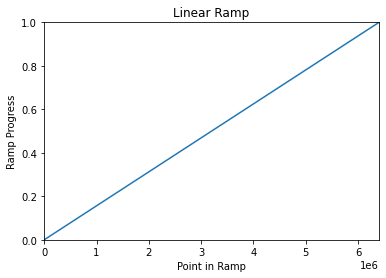

In [14]:
fig, ax = plt.subplots()
ax.plot(vals)
ax.set_ylim(0,1)
ax.set_xlim(0,numPts);
ax.set_xlabel('Point in Ramp')
ax.set_ylabel('Ramp Progress');
ax.set_title('Linear Ramp')

## tanh Ramp

more flexible than the built in version.

In [226]:
numPts = 500
minTV = -3
maxTV = 3
vals = []
# be careful to make sure properly goes from min to max
for ptnum in range(numPts):
    vals.append((np.tanh(minTV + (maxTV - minTV)*ptnum/numPts)-np.tanh(minTV))/(np.tanh(maxTV)-np.tanh(minTV)))
if max(vals) > 1 or min(vals) < 0:
    print(min(vals),max(vals))
    raise ValueError('BAD RAMP!')
with open("Ramp_Files/tanhRamp.txt", "w") as file:
    for val in vals:
        file.write(str(val) + " " )

Text(0.5, 1.0, 'Tanh Ramp')

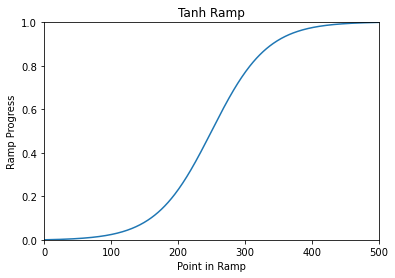

In [227]:
fig, ax = plt.subplots()
ax.plot(vals)
ax.set_ylim(0,1)
ax.set_xlim(0,numPts);
ax.set_xlabel('Point in Ramp')
ax.set_ylabel('Ramp Progress');
ax.set_title('Tanh Ramp')

## Cubic Mid-Slow Ramp

In [59]:
int(16000000 * 30/50)

9600000

In [56]:
numPts = int(16000000 * 30/50)
# 0 goes to linear, high goes to a very slow midpoint ramp. To get even  flatter you need higher order polynomials.
slopeRatio = 5
# for ramps of interest, x0 should basically be where 
x_0 = 0.5 # usually 0.5

vals = []
a_1 = 1
a_3 = slopeRatio
minPt = -(a_1 * x_0 + a_3 * x_0**3)
maxPt = (a_1 * (1-x_0) + a_3 * (1-x_0)**3)
for pt in range(numPts):
    xp = pt/numPts    
    vals.append(((a_1 * (xp-x_0) + a_3 * (xp-x_0)**3) - minPt)/(maxPt-minPt))
if max(vals) > 1 or min(vals) < 0:
    raise ('BAD RAMP!')
with open("Ramp_Files/midSlow.txt", "w") as file:
    for val in vals:
        file.write(str(val) + " " )

Text(0.5, 1.0, 'Mid-Slow Ramp')

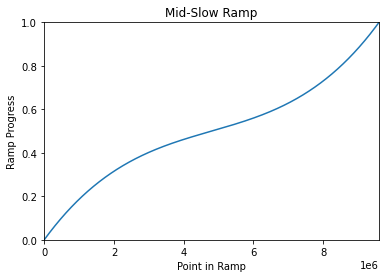

In [57]:
fig, ax = plt.subplots()
ax.plot(vals)
ax.set_ylim(0,1)
ax.set_xlim(0,numPts);
ax.set_xlabel('Point in Ramp')
ax.set_ylabel('Ramp Progress');
ax.set_title('Mid-Slow Ramp')

## Exponential-Based

In [278]:
decayConstant = 0.15
time_ms = 25

### Exponential Decay

start fast, end slow

#### niawg sampling

In [279]:
niawgTime_ms = time_ms
numPts = int(320000 * niawgTime_ms)
# at high values the ramp becomes linear. at low values it becomes sudden.
relativeDecayConstant = decayConstant
vals = []
# be careful to make sure properly goes from min to max
for ptnum in range(numPts):
    tp = ptnum/numPts
    vals.append((1-np.exp(-tp/relativeDecayConstant))/(1-np.exp(-1/relativeDecayConstant)))
if max(vals) > 1 or min(vals) < 0:
    print(min(vals),max(vals))
#    raise ValueError('BAD RAMP!')
with open("Ramp_Files/expDecay_Niawg.txt", "w") as file:
    for val in vals:
        file.write(str(val) + " " )

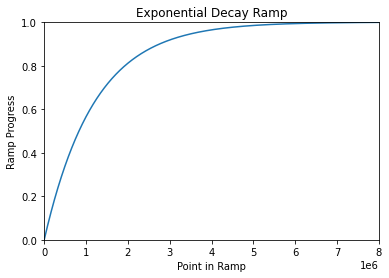

In [280]:
fig, ax = plt.subplots()
ax.plot(vals)
ax.set_ylim(0,1)
ax.set_xlim(0,numPts);
ax.set_xlabel('Point in Ramp')
ax.set_ylabel('Ramp Progress')
ax.set_title('Exponential Decay Ramp');

#### agilent Sampling

In [281]:
agTime_ms = time_ms
numPts = int(500 * agTime_ms)
# at high values the ramp becomes linear. at low values it becomes sudden.
relativeDecayConstant = decayConstant
vals = []
# be careful to make sure properly goes from min to max
for ptnum in range(numPts):
    tp = ptnum/numPts
    vals.append((1-np.exp(-tp/relativeDecayConstant))/(1-np.exp(-1/relativeDecayConstant)))
if max(vals) > 1 or min(vals) < 0:
    print(min(vals),max(vals))
#    raise ValueError('BAD RAMP!')
with open("Ramp_Files/expDecay_Ag.txt", "w") as file:
    for val in vals:
        file.write(str(val) + " " )

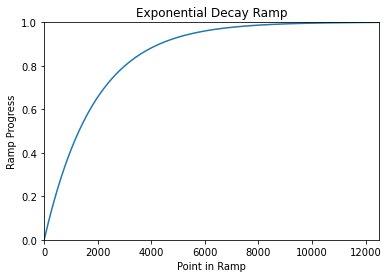

In [282]:
fig, ax = plt.subplots()
ax.plot(vals)
ax.set_ylim(0,1)
ax.set_xlim(0,numPts);
ax.set_xlabel('Point in Ramp')
ax.set_ylabel('Ramp Progress')
ax.set_title('Exponential Decay Ramp');

### Exponential Rise

start slow, end fast

#### niawg sampling

In [283]:
niawgTime_ms = time_ms
numPts = int(320000 * niawgTime_ms)
# at high values the ramp becomes linear. at low values it becomes sudden.
relativeDecayConstant = decayConstant
vals = []
# be careful to make sure properly goes from min to max
for ptnum in range(numPts):
    tp = ptnum/numPts
    vals.append((np.exp(tp/relativeDecayConstant)-1)/(np.exp(1/relativeDecayConstant)-1))
if max(vals) > 1 or min(vals) < 0:
    print(min(vals),max(vals))
    raise ValueError('BAD RAMP!')
with open("Ramp_Files/expRise_Niawg.txt", "w") as file:
    for val in vals:
        file.write(str(val) + " " )

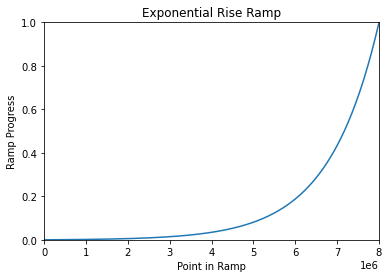

In [284]:
fig, ax = plt.subplots()
ax.plot(vals)
ax.set_ylim(0,1)
ax.set_xlim(0,numPts);
ax.set_xlabel('Point in Ramp')
ax.set_ylabel('Ramp Progress')
ax.set_title('Exponential Rise Ramp');

#### agilent Sampling

In [285]:
agTime_ms = time_ms
numPts = int(500 * agTime_ms)
# at high values the ramp becomes linear. at low values it becomes sudden.
relativeDecayConstant = decayConstant
vals = []
# be careful to make sure properly goes from min to max
for ptnum in range(numPts):
    tp = ptnum/numPts
    vals.append((np.exp(tp/relativeDecayConstant)-1)/(np.exp(1/relativeDecayConstant)-1))
if max(vals) > 1 or min(vals) < 0:
    print(min(vals),max(vals))
    raise ValueError('BAD RAMP!')
with open("Ramp_Files/expRise_Ag.txt", "w") as file:
    for val in vals:
        file.write(str(val) + " " )

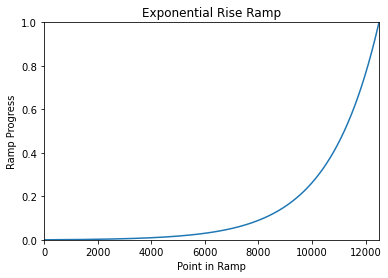

In [286]:
fig, ax = plt.subplots()
ax.plot(vals)
ax.set_ylim(0,1)
ax.set_xlim(0,numPts);
ax.set_xlabel('Point in Ramp')
ax.set_ylabel('Ramp Progress')
ax.set_title('Exponential Rise Ramp');